In [32]:
%matplotlib inline

import numpy as np
import pandas as pd
import math
from statsmodels.tsa.stattools import adfuller

## Detecting bubbles

Based on: https://itamarcaspi.github.io/psymonitor/articles/illustrationSNP.html

In [7]:
shiller_data = pd.read_excel('http://www.econ.yale.edu/~shiller/data/ie_data.xls', header=7)[:-3][['Date', 'CAPE']]

In [17]:
price_div = shiller_data.iloc[1224:1771]

In [19]:
price_div.index = price_div['Date']

In [22]:
price_div = price_div['CAPE']

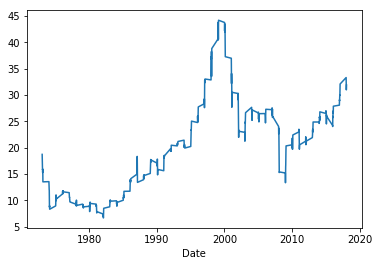

In [26]:
price_div.plot()

## Set variables

In [31]:
data = price_div
n_observations = len(data)
r0 = 0.01 + 1.8 / np.sqrt(n_observations)
min_window = math.floor(r0 * n_observations)
dim = n_observations - min_window + 1
lags = 2
max_lags = 6
yr = 2
control_sample_size = 12 * yr + min_window - 1
nboot = 99

## Implementing the functions etc to detect bubbles

In [ ]:
def PSY(y, swindow0, IC, adflag):
    """
    Estimate PSY's BSADF sequence of test statistics
    implements the real time bubble detection procedure of Phillips, Shi and Yu (2015a,b)
    
    param: y: np.array of the data
    param: swindow0: integer minimum window size 
    param: IC: An integer. 0 for fixed lag order (default), 1 for AIC and 2 for BIC (default = 0).
    param: adflag: An integer, lag order when IC=0; maximum number of lags when IC>0 (default = 0).
    
    return: list BSADF test statistic.
    """
    t = length(y)
    
    if not swindow0: 
        swindow0 <- math.floor(t * (0.01 + 1.8 / sqrt(t)))

    bsadfs = matrix(data = NA, nrow = t, ncol = 1)

    for r2 in range(swindow0,t):
        rwadft <- matrix(data = -999, nrow = r2 - swindow0 + 1, ncol = 1)
        for r1 in range(1,(r2 - swindow0 + 1)):
            rwadft[r1] = float(adfuller(y[r1:r2], maxlag=adflag, autolag=IC)) # two tail 5% significant level TODO check if this works
    

        bsadfs[r2, 1] <- max(unlist(rwadft))
  
    bsadf = bsadfs[swindow0:t]

    return(bsadf)
    

In [ ]:
def cvPSYwmboot(y, swindow0, IC, adflag, Tb, nboot, nCores = 2):
    